In [1]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
boston = datasets.load_boston()
print(boston.data.shape)
print(boston.target.shape)
X=boston.data
Y=boston.target

(506, 13)
(506,)


In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.1, random_state=0,)
print(X_train.shape, X_test.shape, Y_train.shape,Y_test.shape)

(455, 13) (51, 13) (455,) (51,)


In [4]:
Y_train=np.reshape(Y_train,(455,1))
Y_test=np.reshape(Y_test,(51,1))
print(Y_train.shape,Y_test.shape)

(455, 1) (51, 1)


In [5]:
model=tf.keras.Sequential([
    layers.Dense(50,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(100,activation='relu'),
    layers.Dense(50,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

In [6]:
model.compile(loss='mean_absolute_error',optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),metrics=['MeanAbsoluteError'])

In [7]:
history=model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
15/15 [==============================] - 0s 2ms/step - loss: 63.5523 - mean_absolute_error: 63.5523
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 11.1808 - mean_absolute_error: 11.1808
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 10.6155 - mean_absolute_error: 10.6155
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 9.8484 - mean_absolute_error: 9.8484
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 9.7739 - mean_absolute_error: 9.7739
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 8.8217 - mean_absolute_error: 8.8217
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 8.1210 - mean_absolute_error: 8.1210
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 8.0081 - mean_absolute_error: 8.0081
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 8.0101 - mean_absolute_error: 8.0101
Epoc

In [8]:
y_pred=model.predict(X_test)
model.evaluate(X_test,Y_test)

2/2 [==============================] - 0s 2ms/step - loss: 6.0424 - mean_absolute_error: 6.0424


[6.042447090148926, 6.042447090148926]

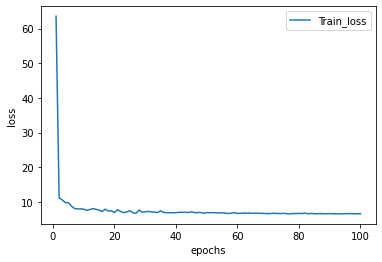

In [9]:
import matplotlib.pyplot as plt

epochs=len(history.history['loss'])
plt.plot([i for i in range(1,epochs+1)],history.history['loss'],label="Train_loss")
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()